# This analysis covers the daily data of NIFTY-50 spanning the last 24 years, from 1999 to 2023, conducted using Python.

## Importing necessary libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

## Loading file in Pandas

In [2]:
df=pd.read_excel("/kaggle/input/nifty-50daily-data-from-1999-2023/NIFTY 50 Data.xlsx")
df

,Date,Open,High,Low,Close,Price_to_Earnings,Price_to_Book,Div_Yield_Perc
0,2023-08-31,19375.55,19388.20,19223.65,19253.80,21.97,4.40,1.38
1,2023-08-30,19433.45,19452.80,19334.75,19347.45,22.07,4.42,1.38
2,2023-08-29,19374.85,19377.90,19309.10,19342.65,22.07,4.42,1.38
3,2023-08-28,19298.35,19366.85,19249.70,19306.05,22.03,4.43,1.38
4,2023-08-25,19297.40,19339.55,19229.70,19265.80,21.98,4.44,1.38
...,...,...,...,...,...,...,...,...
6805,1996-04-26,1133.17,1133.17,1106.29,1123.60,NaN,NaN,NaN
6806,1996-04-25,1157.94,1160.16,1110.61,1120.80,NaN,NaN,NaN
6807,1996-04-24,1136.97,1145.11,1126.77,1145.10,NaN,NaN,NaN
6808,1996-04-23,1090.04,1100.51,1090.04,1095.80,NaN,NaN,NaN


## Changing necessary column names 

In [3]:
df.rename(columns={"Price_to_Earnings":"P/E","Price_to_Book":"P/B","Div_Yield_Perc":"dividend_perc"},inplace=True)

## Concise summary of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6810 non-null   datetime64[ns]
 1   Open           6809 non-null   float64       
 2   High           6809 non-null   float64       
 3   Low            6809 non-null   float64       
 4   Close          6810 non-null   float64       
 5   P/E            6141 non-null   float64       
 6   P/B            6141 non-null   float64       
 7   dividend_perc  6141 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 425.8+ KB


# Dropping rows containing null values and Changing required datatypes

In [5]:
df.dropna(inplace=True)

df['dividend_perc'] = pd.to_numeric(df['dividend_perc'], errors='coerce')
df

,Date,Open,High,Low,Close,P/E,P/B,dividend_perc
0,2023-08-31,19375.55,19388.20,19223.65,19253.80,21.97,4.40,1.38
1,2023-08-30,19433.45,19452.80,19334.75,19347.45,22.07,4.42,1.38
2,2023-08-29,19374.85,19377.90,19309.10,19342.65,22.07,4.42,1.38
3,2023-08-28,19298.35,19366.85,19249.70,19306.05,22.03,4.43,1.38
4,2023-08-25,19297.40,19339.55,19229.70,19265.80,21.98,4.44,1.38
...,...,...,...,...,...,...,...,...
6136,1999-01-07,932.95,961.15,932.95,954.70,12.46,2.22,1.71
6137,1999-01-06,923.30,930.55,915.65,928.25,12.11,2.16,1.75
6138,1999-01-05,901.00,907.20,893.15,907.20,11.84,2.11,1.79
6139,1999-01-04,896.40,905.45,895.75,897.80,11.72,2.08,1.81


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 0 to 6140
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6141 non-null   datetime64[ns]
 1   Open           6141 non-null   float64       
 2   High           6141 non-null   float64       
 3   Low            6141 non-null   float64       
 4   Close          6141 non-null   float64       
 5   P/E            6141 non-null   float64       
 6   P/B            6141 non-null   float64       
 7   dividend_perc  6140 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 431.8 KB


## 

# Now that we have a clear file with no null values we can start analysing the index in different parameters 

In [7]:
df.iloc[:, 1:].describe()

,Open,High,Low,Close,P/E,P/B,dividend_perc
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6140.000000
mean,6494.537526,6534.472366,6445.391418,6490.899756,20.782092,3.602666,1.400751
std,4929.404228,4945.915686,4902.180818,4924.904708,4.956375,0.782386,0.377808
min,853.000000,877.000000,849.950000,854.200000,10.680000,1.920000,0.590000
25%,1996.300000,2019.350000,1984.750000,1999.000000,17.550000,3.070000,1.160000
50%,5365.700000,5399.700000,5318.900000,5361.600000,20.630000,3.520000,1.310000
75%,9336.200000,9352.550000,9230.800000,9285.300000,23.360000,4.060000,1.510000
max,19850.900000,19991.850000,19758.400000,19979.150000,42.000000,6.550000,3.180000


### Calculate the Daily return of the index

In [8]:
df['daily_return']=((df['Close']-df['Open'])/df['Open'])*100
df

,Date,Open,High,Low,Close,P/E,P/B,dividend_perc,daily_return
0,2023-08-31,19375.55,19388.20,19223.65,19253.80,21.97,4.40,1.38,-0.628369
1,2023-08-30,19433.45,19452.80,19334.75,19347.45,22.07,4.42,1.38,-0.442536
2,2023-08-29,19374.85,19377.90,19309.10,19342.65,22.07,4.42,1.38,-0.166195
3,2023-08-28,19298.35,19366.85,19249.70,19306.05,22.03,4.43,1.38,0.039900
4,2023-08-25,19297.40,19339.55,19229.70,19265.80,21.98,4.44,1.38,-0.163753
...,...,...,...,...,...,...,...,...,...
6136,1999-01-07,932.95,961.15,932.95,954.70,12.46,2.22,1.71,2.331315
6137,1999-01-06,923.30,930.55,915.65,928.25,12.11,2.16,1.75,0.536120
6138,1999-01-05,901.00,907.20,893.15,907.20,11.84,2.11,1.79,0.688124
6139,1999-01-04,896.40,905.45,895.75,897.80,11.72,2.08,1.81,0.156180


### Lets find statistical summary now

In [9]:
df.iloc[:,1:].describe()

,Open,High,Low,Close,P/E,P/B,dividend_perc,daily_return
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6140.000000,6141.000000
mean,6494.537526,6534.472366,6445.391418,6490.899756,20.782092,3.602666,1.400751,-0.016770
std,4929.404228,4945.915686,4902.180818,4924.904708,4.956375,0.782386,0.377808,1.357052
min,853.000000,877.000000,849.950000,854.200000,10.680000,1.920000,0.590000,-12.246445
25%,1996.300000,2019.350000,1984.750000,1999.000000,17.550000,3.070000,1.160000,-0.623124
50%,5365.700000,5399.700000,5318.900000,5361.600000,20.630000,3.520000,1.310000,-0.005107
75%,9336.200000,9352.550000,9230.800000,9285.300000,23.360000,4.060000,1.510000,0.621230
max,19850.900000,19991.850000,19758.400000,19979.150000,42.000000,6.550000,3.180000,17.694622


## Highest nifty fall for 1 day was 12.24% and Highest 1 day gain is 17.69%, so lets find out the date for these returns

In [10]:
df[df['daily_return']==df['daily_return'].min()]

,Date,Open,High,Low,Close,P/E,P/B,dividend_perc,daily_return
4791,2004-05-17,1582.5,1583.8,1292.2,1388.7,12.87,2.74,2.64,-12.246445


In [11]:
df[df['daily_return']==df['daily_return'].max()]

,Date,Open,High,Low,Close,P/E,P/B,dividend_perc,daily_return
3547,2009-05-18,3673.15,4384.3,3673.15,4323.1,20.41,3.57,1.29,17.694622


## Plotting the Graph for Index Returns over time

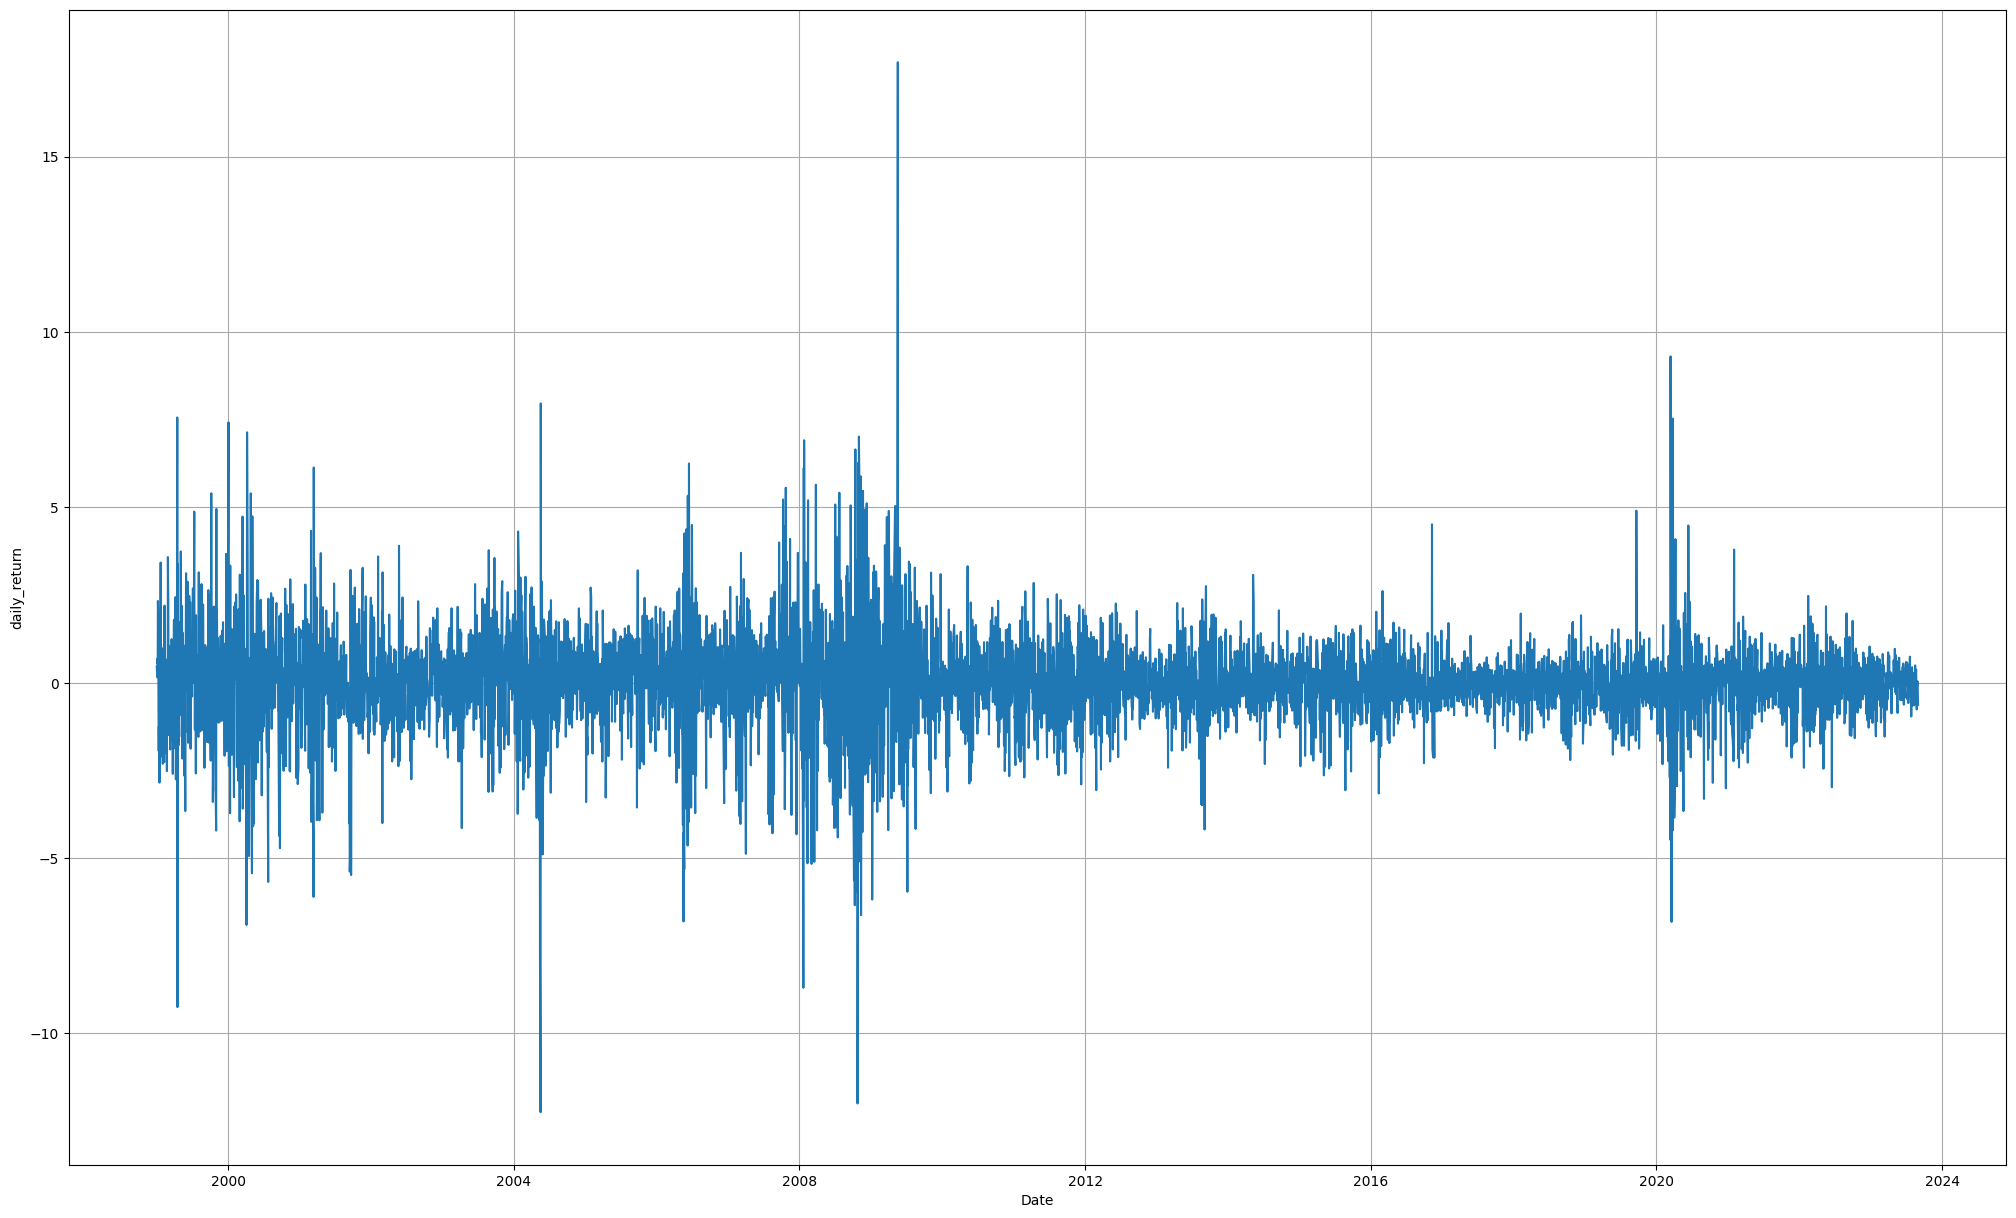

In [12]:
plt.figure(figsize=(25, 15))
sns.lineplot(data=df, x='Date', y='daily_return')
plt.grid(color='darkgrey')
sns.set(font_scale=1.50)
plt.show()

## Plotting the Graph for Index Dividends over time

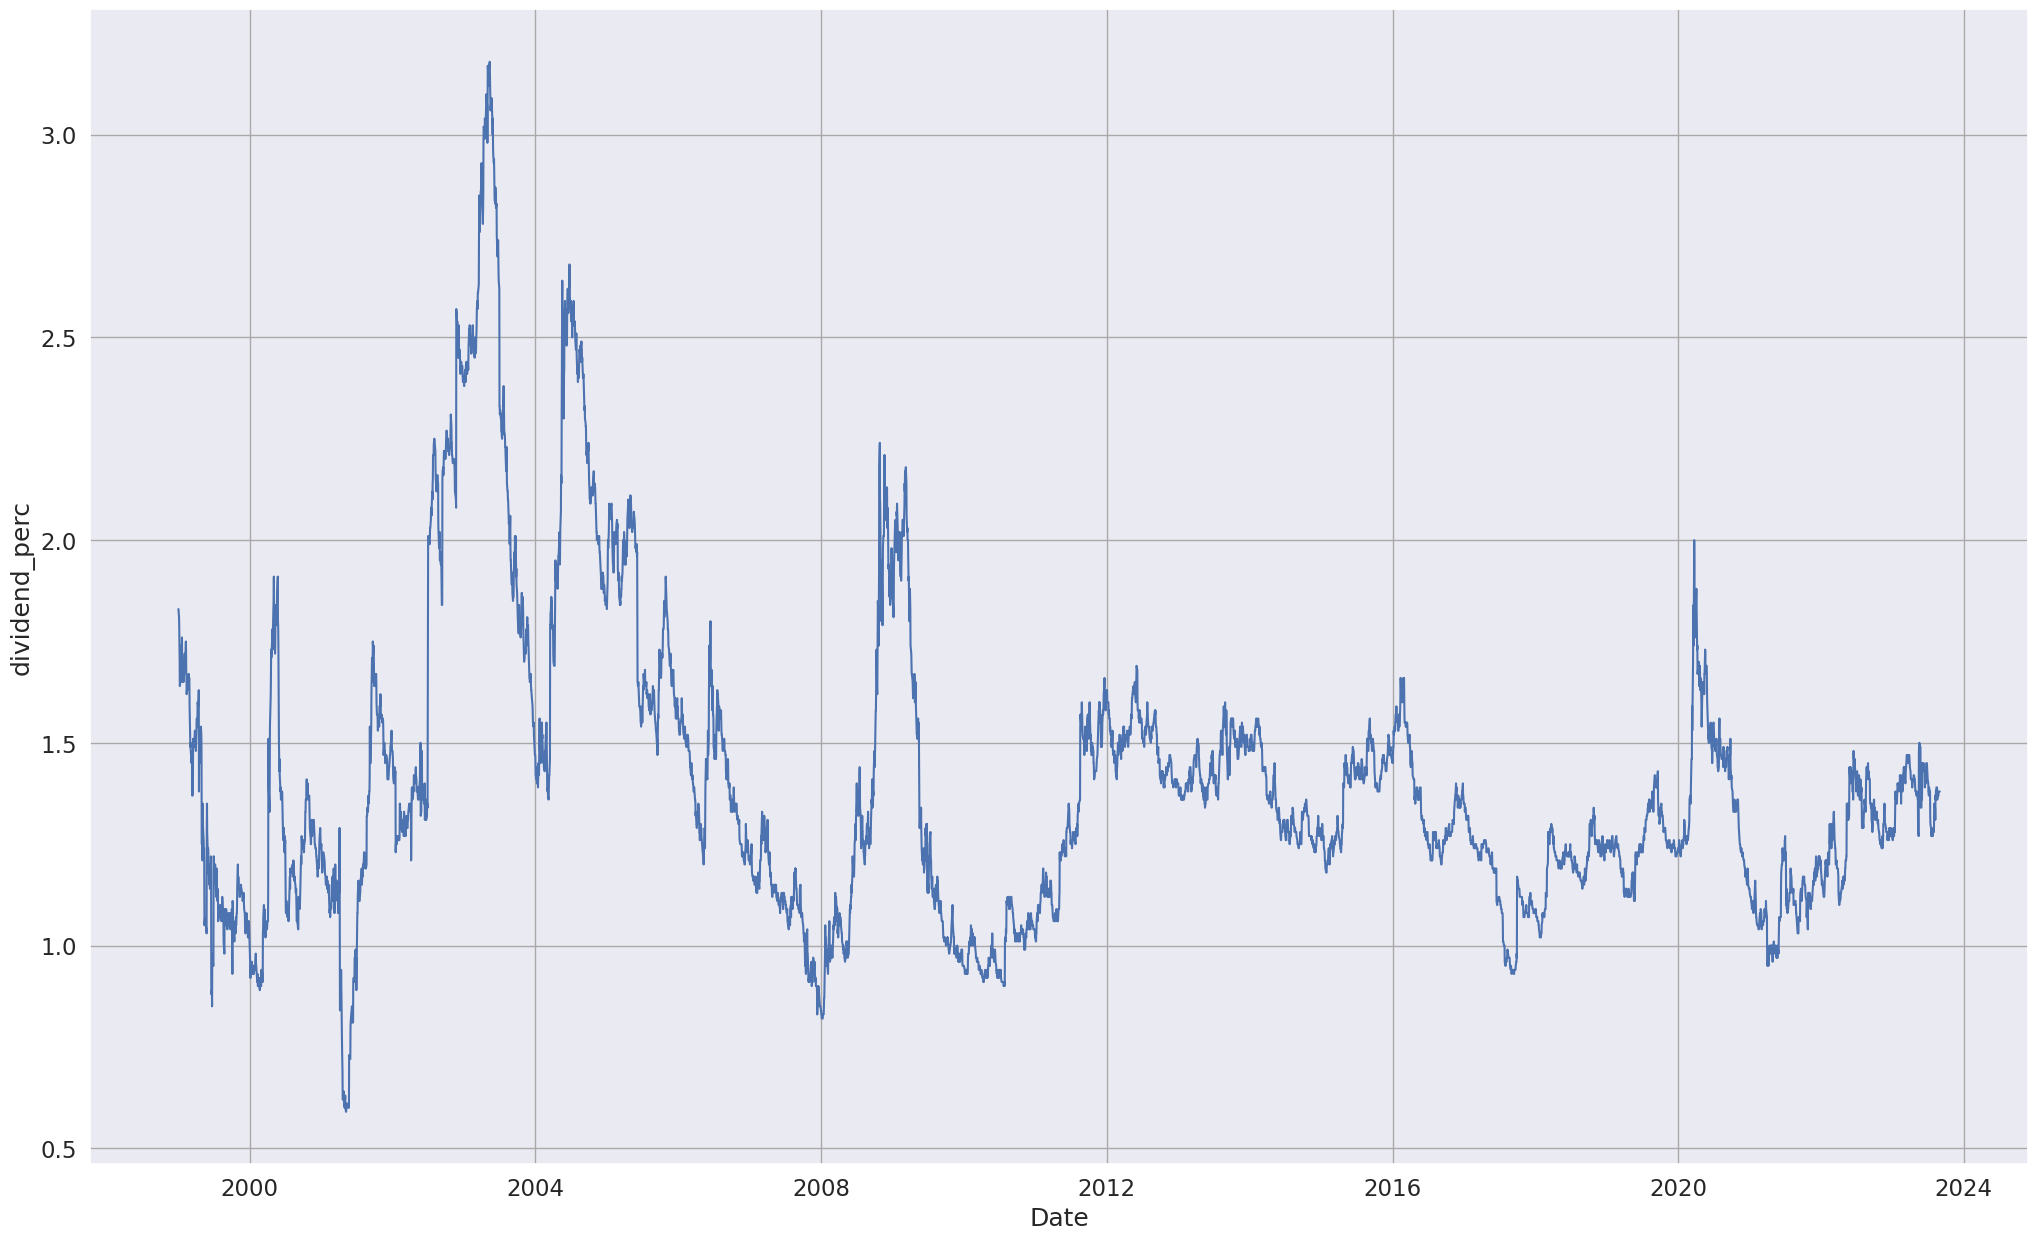

In [13]:
plt.figure(figsize=(25, 15))
sns.lineplot(data=df, x='Date', y='dividend_perc',estimator='mean')
plt.grid(color='darkgrey')
sns.set(font_scale=1.50)
plt.show()

## Lets find out the Daily, Weekly, Monthly, Yearly variations in index Return 

In [14]:
daily_volatility = df['daily_return'].std()
daily_standev = round(daily_volatility,4)
daily_standev

1.3571

In [15]:
week_df=df.set_index('Date')
week_returns = week_df['Close'].resample('W').ffill().pct_change()
weekly_standev = round(week_returns.std(),4)
weekly_standev

0.03

In [16]:
month_df=df.set_index('Date')
monthly_returns = month_df['Close'].resample('M').ffill().pct_change()
monthly_standev = round(monthly_returns.std(),4)
monthly_standev

0.0647

In [17]:
year_df=df.set_index('Date')
yearly_returns = year_df['Close'].resample('Y').ffill().pct_change()
yearly_stadndev = round(yearly_returns.std(),4)
yearly_stadndev

0.2892

## Calculating Standard Deviation of the Dividends on yearly basis

In [18]:
df['Year'] = df['Date'].dt.year
std_by_year_div = df.groupby('Year')['dividend_perc'].std()
std_by_year_div=pd.DataFrame(std_by_year_div)
print(std_by_year_div)

      dividend_perc
Year               
1999       0.246579
2000       0.248214
2001       0.304611
2002       0.448985
2003       0.485487
2004       0.387460
2005       0.190523
2006       0.133112
2007       0.113443
2008       0.376820
2009       0.398790
2010       0.058754
2011       0.183758
2012       0.069047
2013       0.063617
2014       0.094642
2015       0.097436
2016       0.124795
2017       0.115109
2018       0.070232
2019       0.071484
2020       0.177955
2021       0.071948
2022       0.092491
2023       0.058720


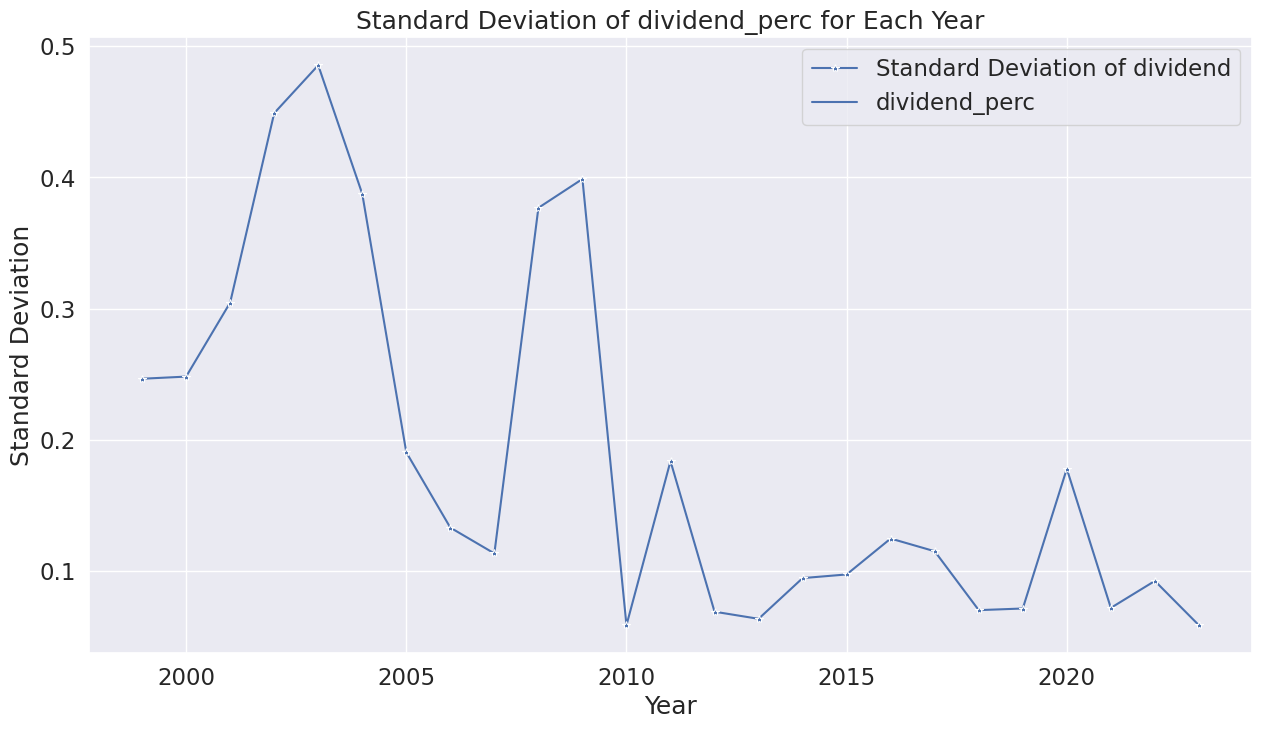

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(data=std_by_year_div,marker='*', label='Standard Deviation of dividend')
plt.xlabel("Year") 
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of dividend_perc for Each Year")
plt.legend()
plt.show()

## Calculating Standard Deviation of the Returns on yearly basis

In [20]:
df['Year'] = df['Date'].dt.year
std_by_year_ret = df.groupby('Year')['daily_return'].std()
std_by_year_ret=pd.DataFrame(std_by_year_ret)
print(std_by_year_ret)

      daily_return
Year              
1999      1.736959
2000      1.988735
2001      1.621323
2002      1.050913
2003      1.235148
2004      1.733628
2005      1.119650
2006      1.651639
2007      1.601035
2008      2.769027
2009      2.165475
2010      1.007666
2011      1.136530
2012      0.828062
2013      0.973539
2014      0.698767
2015      0.860888
2016      0.847497
2017      0.481026
2018      0.706253
2019      0.762432
2020      1.552862
2021      0.817053
2022      0.821790
2023      0.511651


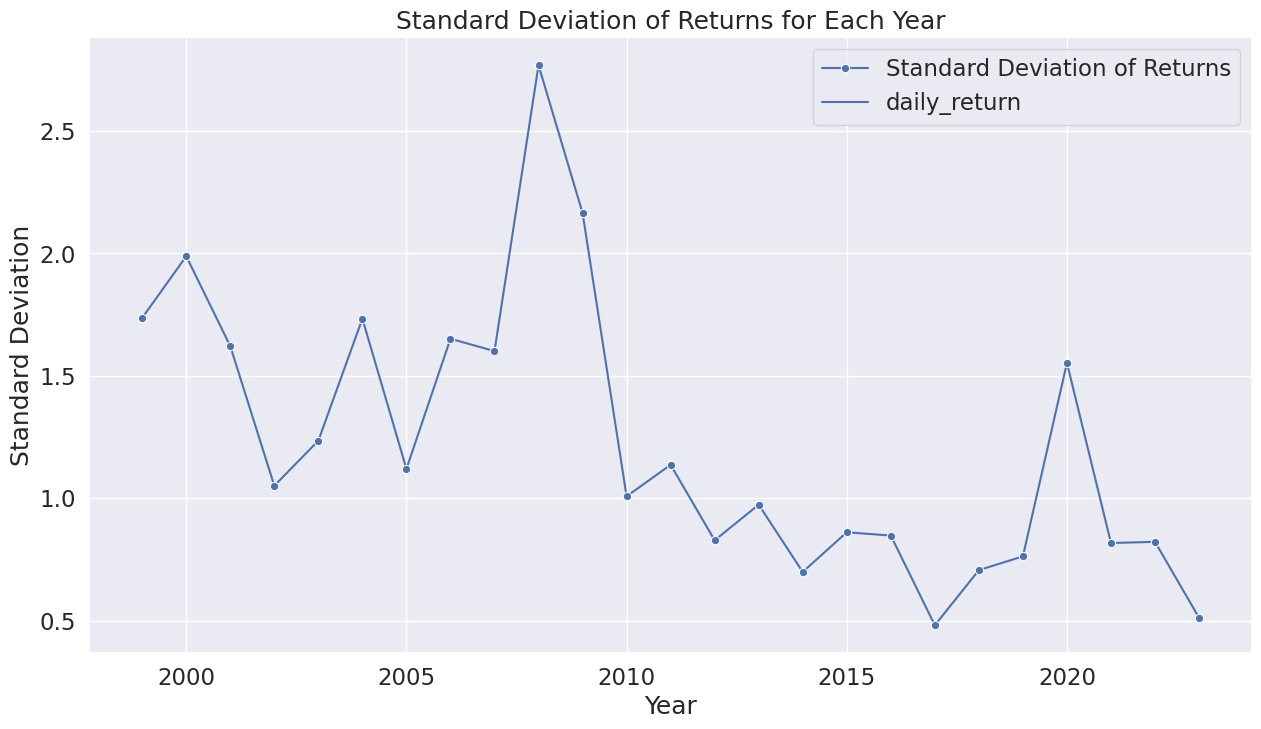

In [21]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=std_by_year_ret, color="orange", marker='o', label='Standard Deviation of Returns')
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Returns for Each Year")
plt.legend()
plt.show()

## Box Plot to find Outliers in P/E, P/B,Daily Return and Dividends 

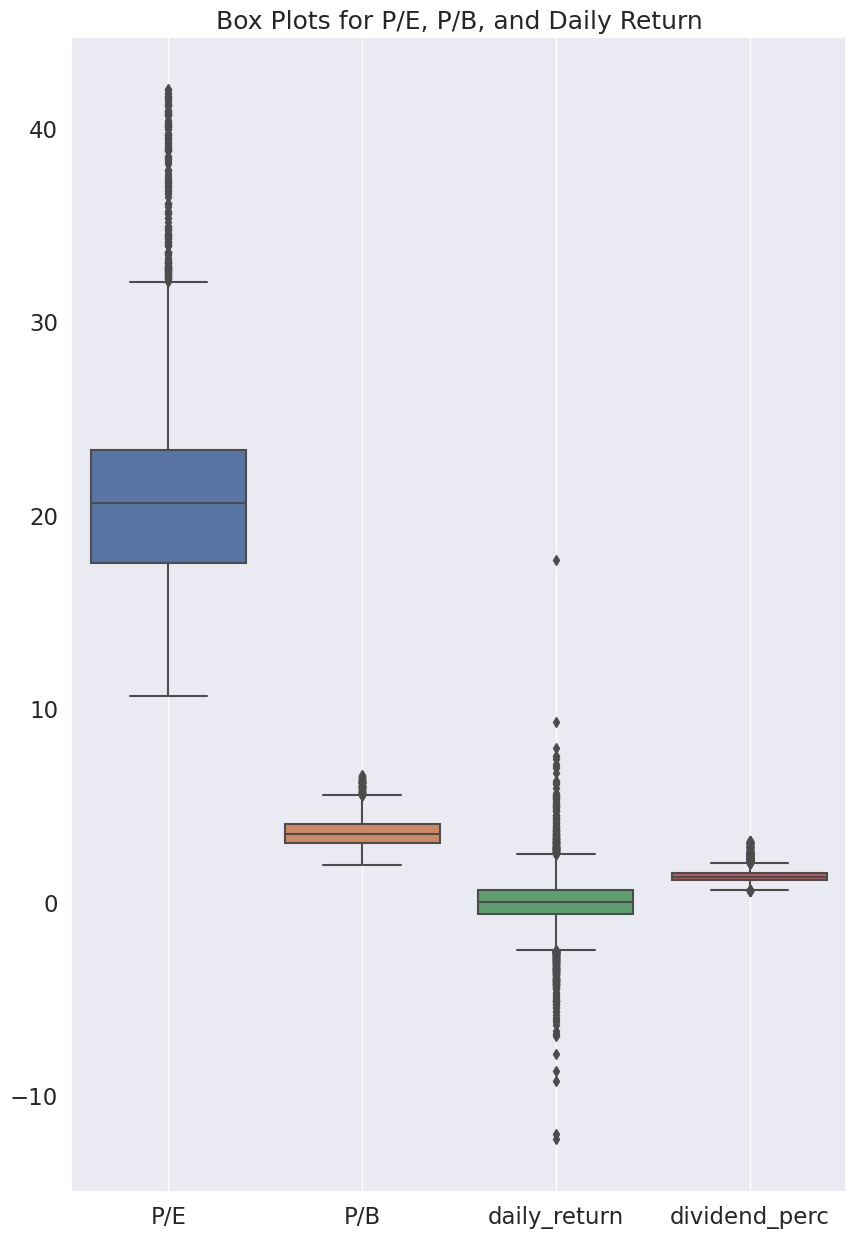

In [22]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df[['P/E', 'P/B','daily_return','dividend_perc']])
plt.title('Box Plots for P/E, P/B, and Daily Return')
plt.grid()
plt.show()

## Finding Correlation between P/E, P/B,Daily Return and Dividends 

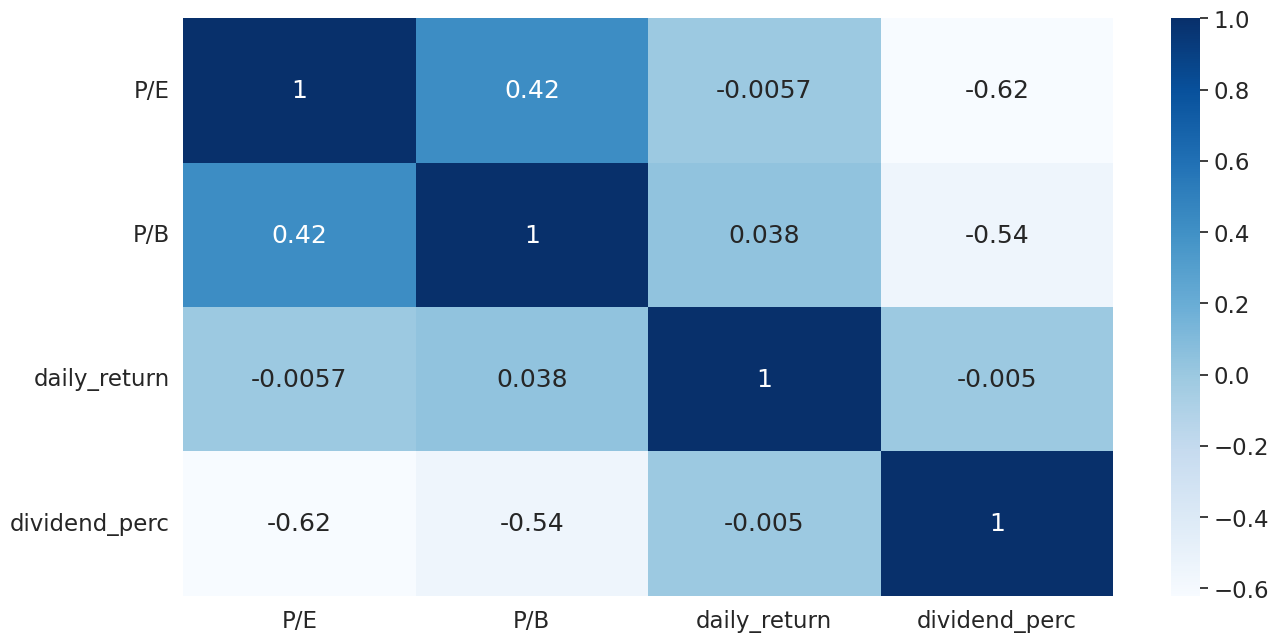

In [23]:
corr= df[['P/E', 'P/B','daily_return','dividend_perc']].corr()
plt.figure(figsize=(15,7.5))
sns.set(font_scale=1.5)
sns.heatmap(data=corr,cmap="Blues",annot=True)
plt.show()

## Plotting Histogram to understand dividends and Daily return Distribution

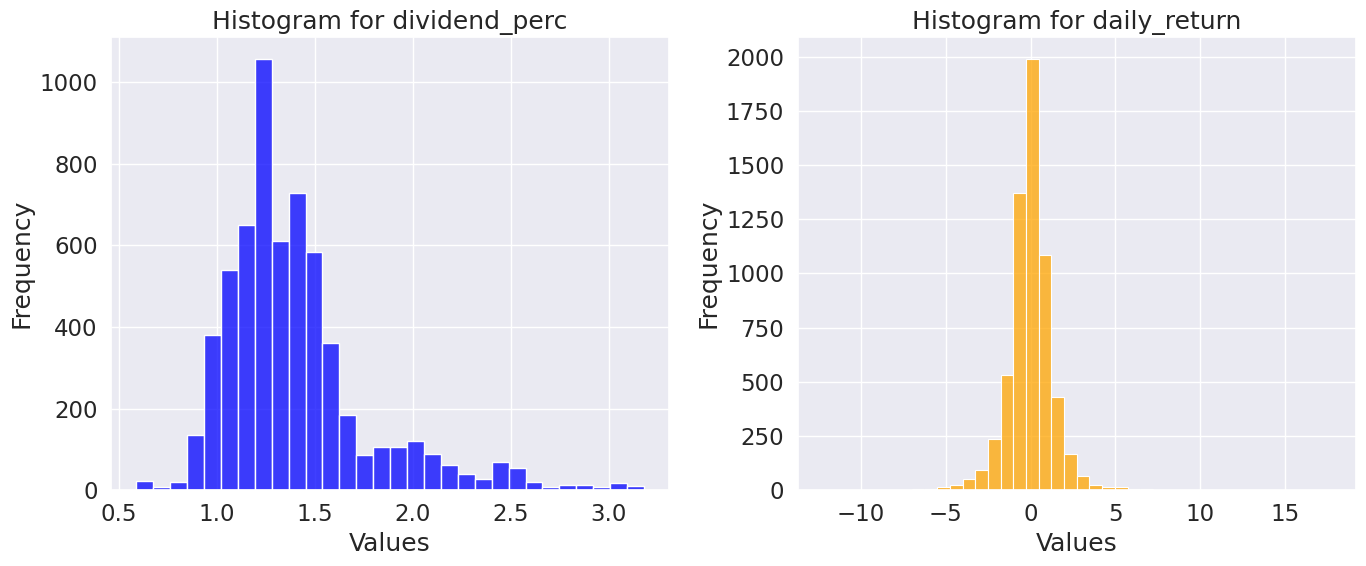

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


sns.histplot(df['dividend_perc'], bins=30, color='blue', ax=axes[0])
axes[0].set_title('Histogram for dividend_perc')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')


sns.histplot(df['daily_return'], bins=40, color='orange', ax=axes[1])
axes[1].set_title('Histogram for daily_return')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## Relation between Dividends and P/E

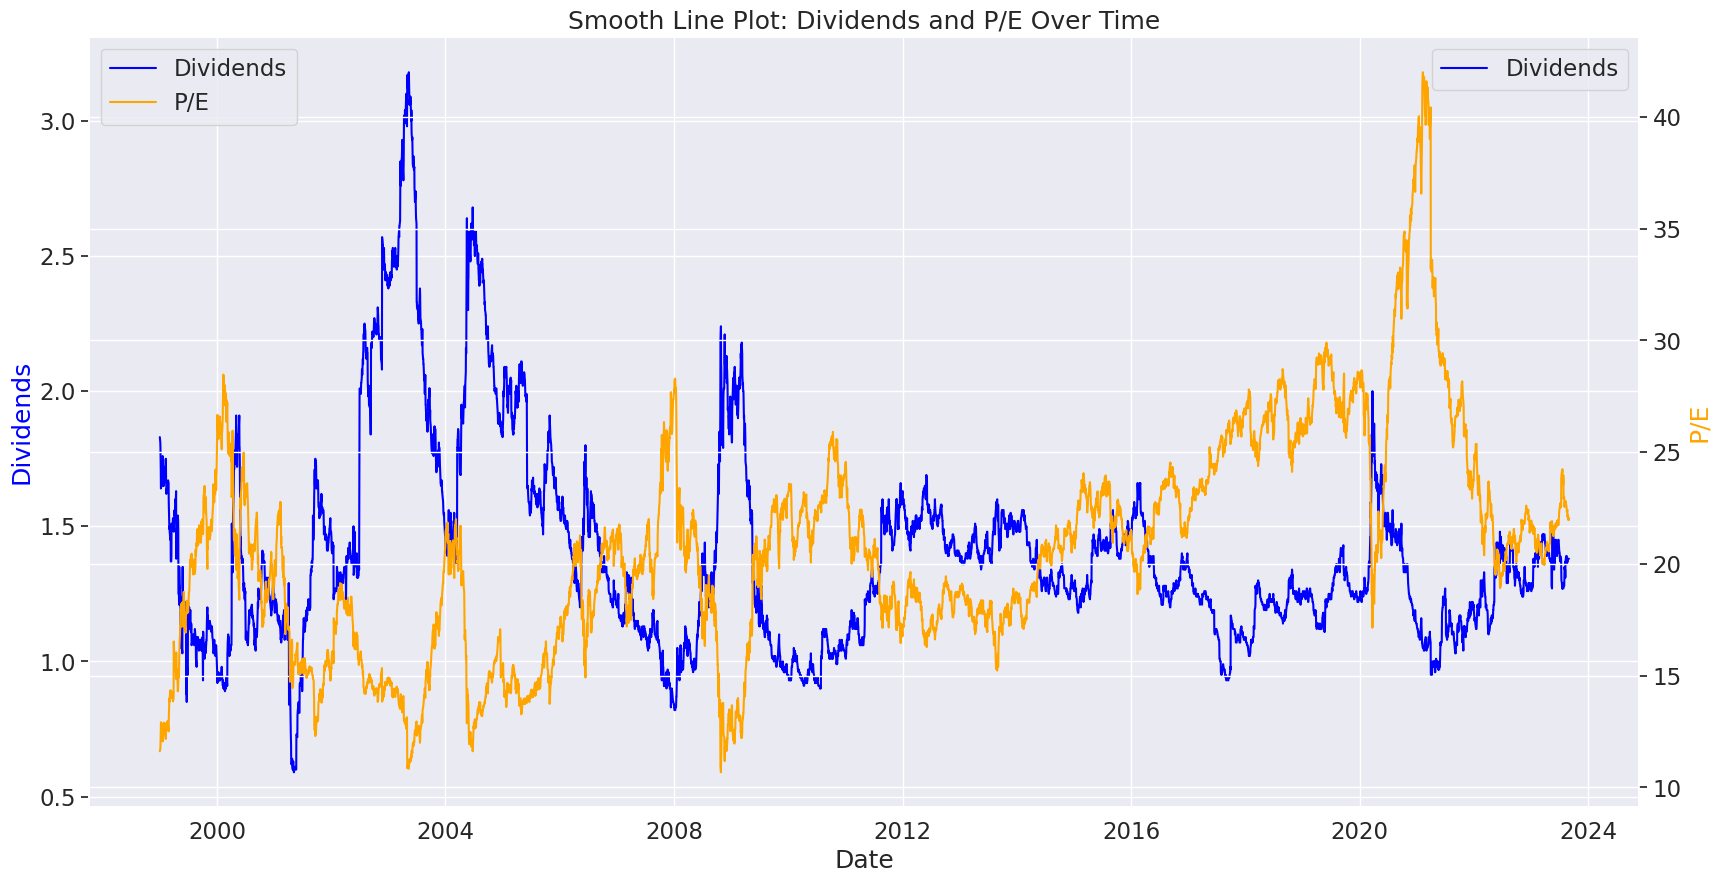

In [25]:
plt.figure(figsize=(20,10))
ax1 = sns.lineplot(x='Date', y='dividend_perc', data=df, label='Dividends', color='blue', estimator='mean')
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='P/E', data=df, label='P/E', color='orange', ax=ax2, estimator='mean')

ax1.set_title('Smooth Line Plot: Dividends and P/E Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Dividends', color='blue')
ax2.set_ylabel('P/E', color='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()